In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
friends = pd.read_csv('/content/drive/MyDrive/Datasets/friends_episodes_v2.csv')

In [6]:
friends.head()

,Year_of_prod,Season,Episode_Title,Duration,Summary,Director,Stars,Votes
0,1994,1,The One with the Sonogram at the End,22,Ross finds out his ex-wife is pregnant. Rachel...,James Burrows,8.1,4888
1,1994,1,The One with the Thumb,22,Monica becomes irritated when everyone likes h...,James Burrows,8.2,4605
2,1994,1,The One with George Stephanopoulos,22,Joey and Chandler take Ross to a hockey game t...,James Burrows,8.1,4468
3,1994,1,The One with the East German Laundry Detergent,22,"Eager to spend time with Rachel, Ross pretends...",Pamela Fryman,8.5,4438
4,1994,1,The One with the Butt,22,Monica's obsessiveness is put to the test afte...,Arlene Sanford,8.1,4274


In [7]:
friends.tail()

,Year_of_prod,Season,Episode_Title,Duration,Summary,Director,Stars,Votes
230,2004,10,The One with Princess Consuela,22,When Phoebe goes to get her name changed she r...,Gary Halvorson,8.6,2989
231,2004,10,The One Where Estelle Dies,22,Ross tries to get Rachel to go back to Ralph L...,Gary Halvorson,8.5,2771
232,2004,10,The One with Rachel's Going Away Party,22,"The gang throws Rachel a goodbye party, during...",Gary Halvorson,8.9,3141
233,2004,10,The Last One,30,Erica gives birth to the baby that Monica and ...,Kevin Bright,9.5,6221
234,2004,10,The Last One,30,Phoebe races Ross to the airport in a bid to s...,Kevin Bright,9.7,10381


In [8]:
friends.duplicated().sum()

0

In [9]:
friends.loc[233,'Episode_Title'] = 'The Last One - I'
friends.loc[234,'Episode_Title'] = 'The Last One - II'

In [10]:
friends.tail()

,Year_of_prod,Season,Episode_Title,Duration,Summary,Director,Stars,Votes
230,2004,10,The One with Princess Consuela,22,When Phoebe goes to get her name changed she r...,Gary Halvorson,8.6,2989
231,2004,10,The One Where Estelle Dies,22,Ross tries to get Rachel to go back to Ralph L...,Gary Halvorson,8.5,2771
232,2004,10,The One with Rachel's Going Away Party,22,"The gang throws Rachel a goodbye party, during...",Gary Halvorson,8.9,3141
233,2004,10,The Last One - I,30,Erica gives birth to the baby that Monica and ...,Kevin Bright,9.5,6221
234,2004,10,The Last One - II,30,Phoebe races Ross to the airport in a bid to s...,Kevin Bright,9.7,10381


In [11]:
friends.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year_of_prod   235 non-null    int64  
 1   Season         235 non-null    int64  
 2   Episode_Title  235 non-null    object 
 3   Duration       235 non-null    int64  
 4   Summary        235 non-null    object 
 5   Director       235 non-null    object 
 6   Stars          235 non-null    float64
 7   Votes          235 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 14.8+ KB


In [12]:
friends.isnull().sum()

Year_of_prod     0
Season           0
Episode_Title    0
Duration         0
Summary          0
Director         0
Stars            0
Votes            0
dtype: int64

In [13]:
friends.shape

(235, 8)

In [14]:
friends.Season.value_counts().sort_index()

1     23
2     24
3     25
4     24
5     24
6     25
7     24
8     24
9     24
10    18
Name: Season, dtype: int64

In [15]:
print("The show started in {} and ended in {}".format(min(friends['Year_of_prod']),max(friends['Year_of_prod'])))


The show started in 1994 and ended in 2004


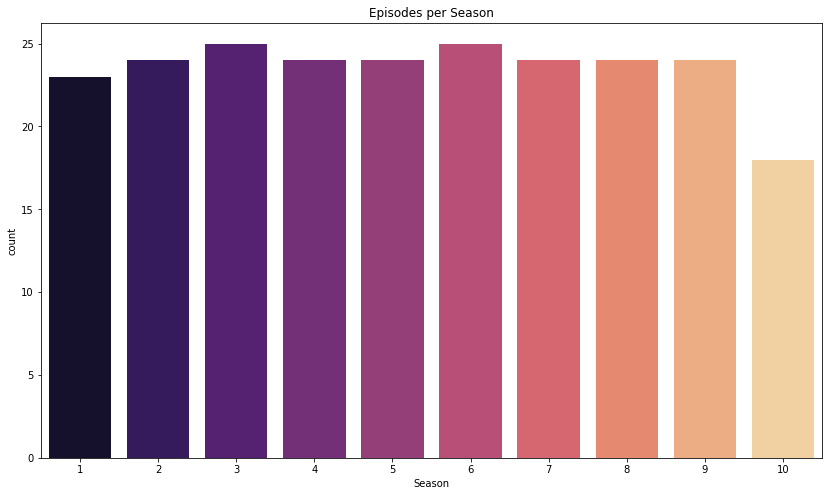

In [16]:
plt.figure(figsize=(14,8))
plt.xlabel("Seasons")
plt.ylabel("Number of Episodes")
plt.title("Episodes per Season")
sns.countplot(x = "Season", data = friends,palette='magma')

In [17]:
duration_season=friends.groupby('Season')['Duration'].sum().to_frame().reset_index()
duration_season

,Season,Duration
0,1,506
1,2,528
2,3,550
3,4,544
4,5,528
5,6,582
6,7,528
7,8,528
8,9,544
9,10,412


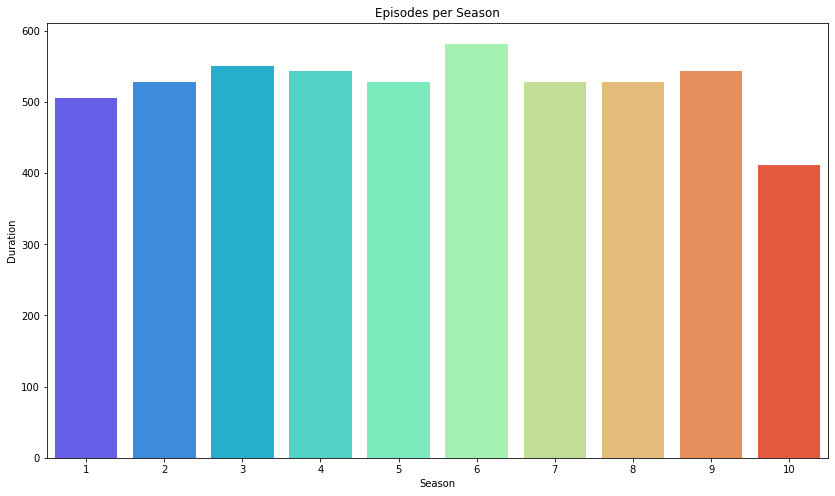

In [48]:
plt.figure(figsize=(14,8))
plt.xlabel("Seasons")
plt.ylabel("Number of Episodes")
plt.title("Episodes per Season")
sns.barplot(x = duration_season.Season,y=duration_season.Duration,palette='rainbow')

In [19]:
top_episodes = friends[['Episode_Title','Stars']].sort_values('Stars',ascending=False).head(10).reset_index(drop=True)
top_episodes

,Episode_Title,Stars
0,The Last One - II,9.7
1,The One Where Everybody Finds Out,9.7
2,The Last One - I,9.5
3,The One with the Embryos,9.5
4,The One with the Prom Video,9.4
5,The One with the Rumor,9.3
6,The One with the Proposal,9.3
7,The One with the Videotape,9.3
8,The One with Monica and Chandler's Wedding: Pa...,9.2
9,The One with Ross's Wedding,9.2


(9.0, 10.0)

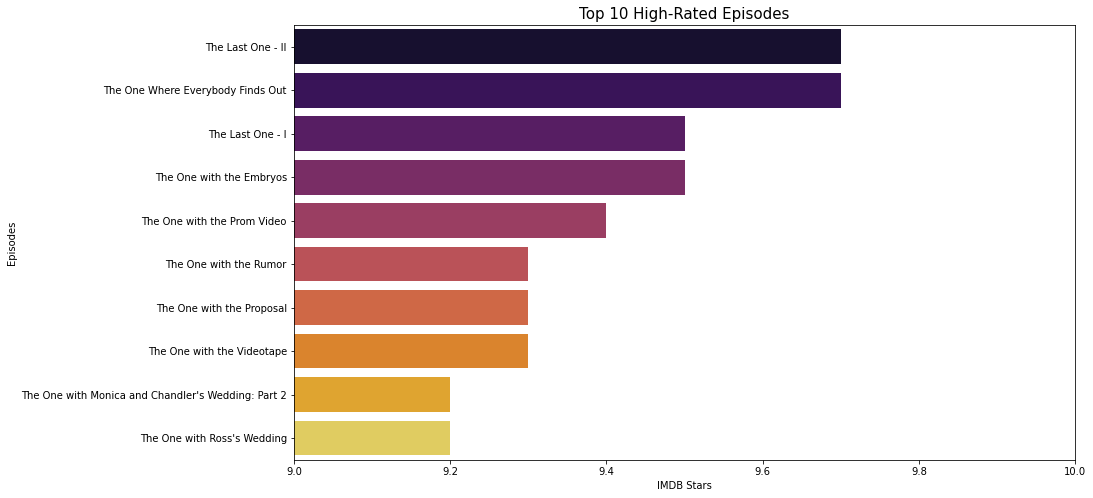

In [47]:
plt.figure(figsize=(14,8))
sns.barplot(y=top_episodes.Episode_Title,x=top_episodes.Stars,palette='inferno')
plt.title('Top 10 High-Rated Episodes', fontsize=15)
plt.xlabel('IMDB Stars')
plt.ylabel('Episodes')
plt.xlim(9, 10)

In [21]:
top_voted_episodes = friends[['Episode_Title','Votes']].sort_values('Votes',ascending=False).head(10).reset_index(drop=True)
top_voted_episodes

,Episode_Title,Votes
0,The Last One - II,10381
1,The One Where Everybody Finds Out,8066
2,The Last One - I,6221
3,The One with the Embryos,6006
4,The One with the Prom Video,5736
5,The One with the Blackout,5469
6,The One with the Rumor,5291
7,The One with the Sonogram at the End,4888
8,The One Where No One's Ready,4637
9,The One with the Thumb,4605


Text(0, 0.5, 'Episodes')

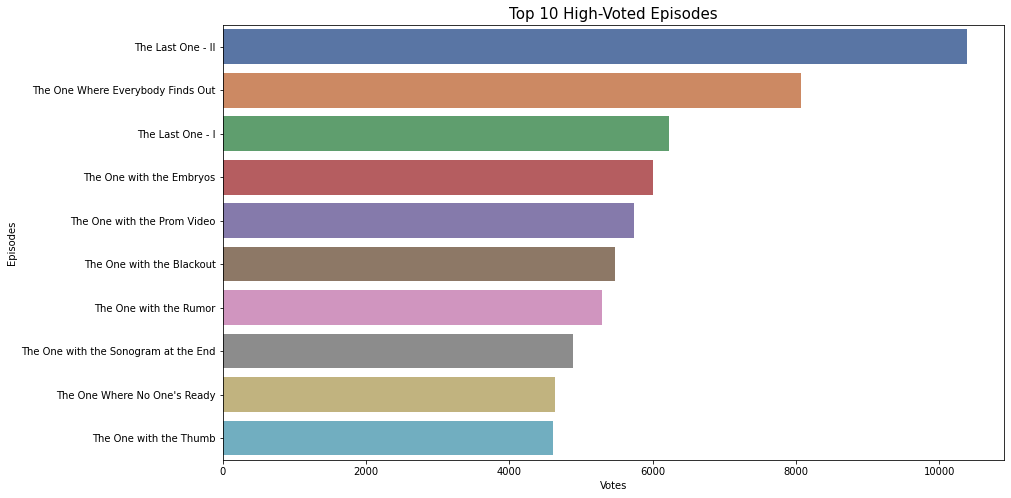

In [46]:
plt.figure(figsize=(14,8))
sns.barplot(y=top_voted_episodes.Episode_Title,x=top_voted_episodes.Votes,palette='deep')
plt.title('Top 10 High-Voted Episodes', fontsize=15)
plt.xlabel('Votes')
plt.ylabel('Episodes')

In [33]:
friends.tail()

,Year_of_prod,Season,Episode_Title,Duration,Summary,Director,Stars,Votes
230,2004,10,The One with Princess Consuela,22,When Phoebe goes to get her name changed she r...,Gary Halvorson,8.6,2989
231,2004,10,The One Where Estelle Dies,22,Ross tries to get Rachel to go back to Ralph L...,Gary Halvorson,8.5,2771
232,2004,10,The One with Rachel's Going Away Party,22,"The gang throws Rachel a goodbye party, during...",Gary Halvorson,8.9,3141
233,2004,10,The Last One - I,30,Erica gives birth to the baby that Monica and ...,Kevin Bright,9.5,6221
234,2004,10,The Last One - II,30,Phoebe races Ross to the airport in a bid to s...,Kevin Bright,9.7,10381


In [42]:
director_count = friends.groupby("Director").Episode_Title.count().sort_values(ascending=False)
director_count

Director
Gary Halvorson          54
Kevin Bright            54
Michael Lembeck         24
Gail Mancuso            14
James Burrows           14
Peter Bonerz            12
Ben Weiss               10
David Schwimmer         10
Shelley Jensen           6
Robby Benson             6
Terry Hughes             5
Dana De Vally Piazza     3
Sheldon Epps             3
Thomas Schlamme          2
Steve Zuckerman          2
Roger Christiansen       2
Alan Myerson             2
Pamela Fryman            2
Paul Lazarus             1
Andrew Tsao              1
Sam Simon                1
Mary Kay Place           1
Joe Regalbuto            1
Stephen Prime            1
Ellen Gittelsohn         1
David Steinberg          1
Arlene Sanford           1
Todd Holland             1
Name: Episode_Title, dtype: int64

In [43]:
top10_dir = director_count.head(10).reset_index()
top10_dir

,Director,Episode_Title
0,Gary Halvorson,54
1,Kevin Bright,54
2,Michael Lembeck,24
3,Gail Mancuso,14
4,James Burrows,14
5,Peter Bonerz,12
6,Ben Weiss,10
7,David Schwimmer,10
8,Shelley Jensen,6
9,Robby Benson,6


Text(0, 0.5, 'No Of Episodes')

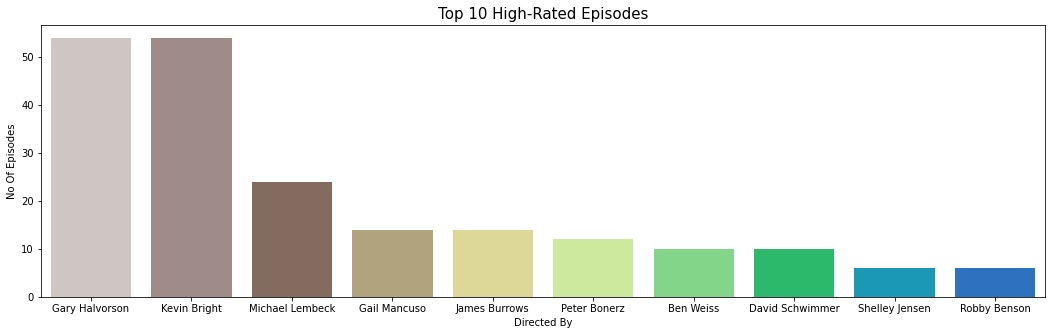

In [45]:
plt.figure(figsize=(18,5))
sns.barplot(x=top10_dir['Director'], y=top10_dir['Episode_Title'], palette='terrain_r')
plt.title('Top 10 High-Rated Episodes', fontsize=15)
plt.xlabel('Directed By')
plt.ylabel('No Of Episodes')

In [49]:
season_stars = friends.groupby('Season').mean().Stars.to_frame().reset_index()
season_stars.columns = ['Season','Average Stars']
season_stars = season_stars.sort_values('Average Stars', ascending=False)
season_stars

,Season,Average Stars
9,10,8.677778
4,5,8.637500
5,6,8.496000
3,4,8.475000
1,2,8.458333
7,8,8.445833
6,7,8.437500
2,3,8.408000
0,1,8.317391
8,9,8.291667


(8.0, 9.0)

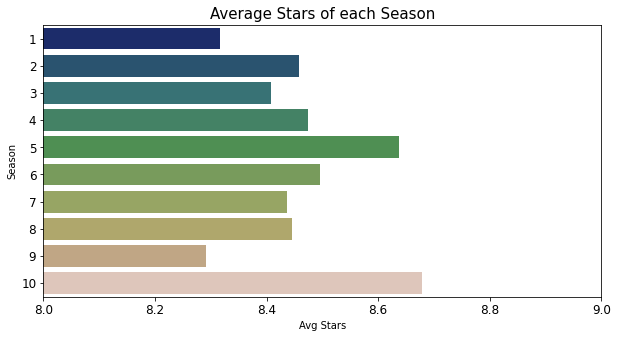

In [52]:
plt.figure(figsize=(10,5))
sns.barplot(y=season_stars.Season, x=season_stars['Average Stars'], palette='gist_earth', orient='h')
plt.title('Average Stars of each Season', fontsize=15)
plt.xlabel('Avg Stars')
plt.ylabel('Season')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(8, 9)